<a href="https://colab.research.google.com/github/Dennis-Farias/cursoIAeML/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
# Carrega o dataset iris
iris = datasets.load_iris()
X = iris.data

In [3]:
# Cria o modelo KMeans
model = KMeans(init='random', n_clusters=3, verbose=True)

In [4]:
# Normalizar as amostras
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xn = scaler.fit_transform(X)

In [ ]:
Xn

In [ ]:
# Ajustar o "modelo"
model.fit(Xn)

In [ ]:
model.labels_

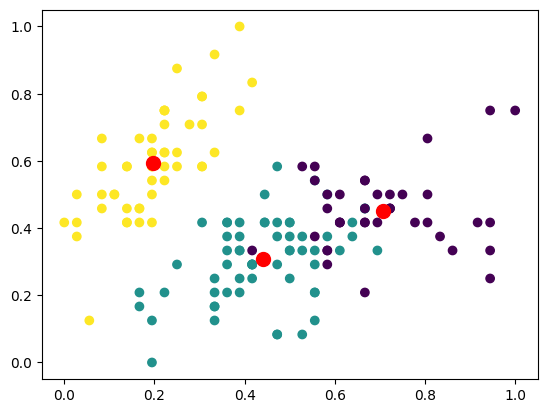

In [14]:
import matplotlib.pyplot as plt
plt.scatter(Xn[:, 0], Xn[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=100)
plt.show()

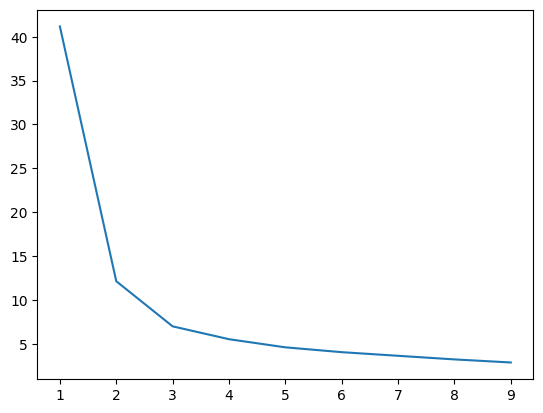

In [15]:
acc = []
for i in range(1,10):
  model = KMeans(init='random', n_clusters=i)
  model.fit(Xn)
  acc.append(model.inertia_)

plt.plot(range(1,10), acc)
plt.show()